# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')


C:\Users\akmittal\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


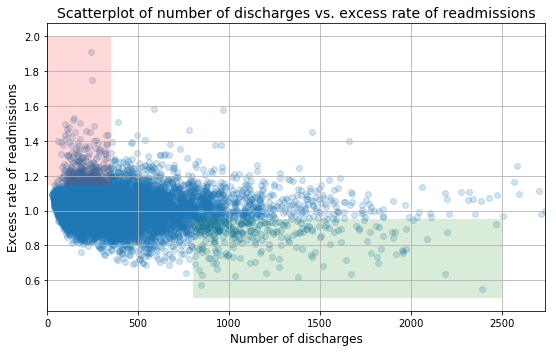

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

I do not agree with the above analysis and recommendations. Based on one scatter plot it is unfair to conclude that the 
hospitals with leass capacity have more readmissions rate and vice versa. More detailed analysis should be done before concluding 
anything.

# Which hypothesis test ?

A two tailed z-test can be conducted.        
H0 - There is NO SIGNIFICANT DIFFERENCE in readmission for small and big hospitals      
H1 - There is significant difference in readmission for small and big hospitals    

Also, the defination of small and big hospitals has to be precise. A smaller hopital can be with number of dicharges less 
than 400 and large hospitals can be greater than 900.


In [5]:
small_hospitals = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <400]
big_hospitals = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >900]
# Let's calculatethe percentage of small and big hospitals with  readmission rate greater than 1.0

percent_small = ((small_hospitals[small_hospitals['Excess Readmission Ratio']>1].count()[0])/(len(small_hospitals)))*100
percent_big = ((big_hospitals[big_hospitals['Excess Readmission Ratio']>1].count()[0])/(len(big_hospitals))) * 100

print('% readmission for big hospitals ', percent_big)
print('% readmission for small hospitals ', percent_small)

% readmission for big hospitals  44.3925233645
% readmission for small hospitals  52.2819989801


From the above we can see that clearly the percentage of readmission is higher for smaller hospitals as compared to the big hospitals

In [6]:
print('Total number of big hopitals ', len(big_hospitals))
print('Total number of small hopitals ', len(small_hospitals))

Total number of big hopitals  642
Total number of small hopitals  7844


The sample size is big enough to conduct the Ztest


In [7]:
# Conduction Z-test
mean_difference = small_hospitals['Excess Readmission Ratio'].mean() - big_hospitals['Excess Readmission Ratio'].mean()
se = math.sqrt(small_hospitals['Excess Readmission Ratio'].std() ** 2/ len(small_hospitals['Excess Readmission Ratio']) 
              + big_hospitals['Excess Readmission Ratio'].std() ** 2/ len(big_hospitals['Excess Readmission Ratio']))
z_score = mean_difference/se
print('The Z score is ', z_score)

The Z score is  6.40542428221


The z score avove is quite big.   
The z critical value for alpha = 0.01 is 2.33, the computed z-value is much higher.   
The null hypothese can be rejected and it can be concluded that small and big hospitals have an impact on the readmission rates. 
Hence, we can accept the alternative hypotheses.

# scatter plot

Below is a clean scatter plot showing the clear results

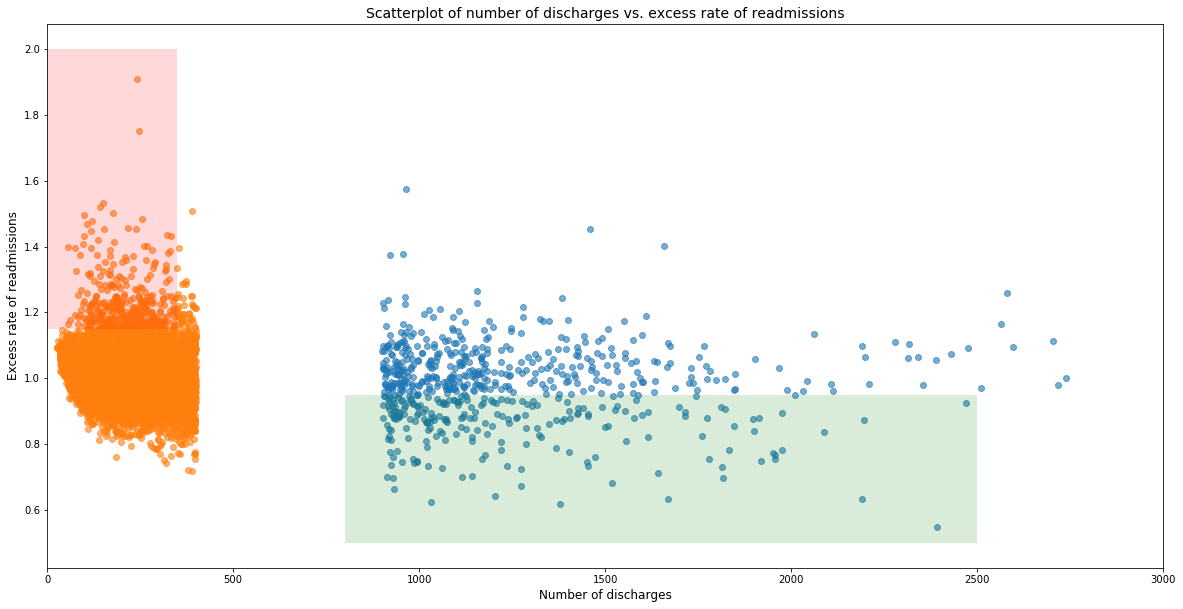

In [8]:
x = [a for a in small_hospitals['Number of Discharges']]
y = list(small_hospitals['Excess Readmission Ratio'])

x2 = [b for b in big_hospitals['Number of Discharges']]
y2 = list(big_hospitals['Excess Readmission Ratio'])


plt.figure(figsize = (20, 10))
plt.scatter(x2, y2,alpha=0.6)
plt.scatter(x, y,alpha=0.6)

plt.xlim([0, 3000])
plt.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
plt.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)


plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)




The above plot clearly conveys the message.